First, import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree

In [21]:
df=pd.read_csv(r"C:\Users\Student\Desktop\Reich\student_dataset.csv")


In [25]:
df.head()

,Grades,Attendance,Study Hours,Label
0,46,0.62,2,Weak
1,59,0.71,3,Weak
2,54,0.67,3,Weak
3,50,0.62,3,Weak
4,47,0.60,4,Weak


In [27]:
#assign data and column
X=df.drop('Label',axis=1)
y=df['Label']

In [29]:
#check class imbalance
df['Label'].value_counts()

Label
Weak        100
Advanced    100
Average     100
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Grades', 'Attendance', 'Study Hours']] = scaler.fit_transform(df[['Grades', 'Attendance', 'Study Hours']])


In [32]:
df

,Grades,Attendance,Study Hours,Label
0,-1.323472,-1.653266,-1.268335,Weak
1,-0.582935,-0.765474,-0.833974,Weak
2,-0.867757,-1.160048,-0.833974,Weak
3,-1.095615,-1.653266,-0.833974,Weak
4,-1.266508,-1.850553,-0.399612,Weak
...,...,...,...,...
295,-0.298114,-0.074969,-0.399612,Average
296,0.385459,0.122318,0.034749,Average
297,0.328495,0.516892,0.469110,Average
298,0.271530,-0.370900,-0.833974,Average


In [33]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

clf = tree.DecisionTreeClassifier(
    criterion="entropy",         # Uses information gain (entropy) for splitting  
    max_depth=3,                 # Limits the depth of the tree to prevent overfitting  
    min_samples_split=20,        # Minimum samples required to split an internal node  
    min_samples_leaf=5,          # Minimum samples required to be a leaf node  
    splitter='best',             # Selects the best feature for splitting  
    max_features='sqrt',         # Uses the square root of the total features for best split  
    ccp_alpha=0.05               # Pruning parameter to reduce complexity  
)

In [35]:
#train classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2, min_samples_split=10,min_samples_leaf=5,splitter='best', max_features='sqrt',ccp_alpha=0.01) # defining decision tree classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("Cross-validation Accuracy:", scores.mean())
print(scores)

Cross-validation Accuracy: 0.8541666666666666
[0.8125     0.875      0.72916667 1.         0.85416667]


In [36]:
clf=clf.fit(X_train,Y_train) # train data on new data and new target
prediction = clf.predict(X_test) #  assign removed data as input

In [37]:
prediction

array(['Advanced', 'Advanced', 'Advanced', 'Weak', 'Weak', 'Advanced',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Weak', 'Weak', 'Advanced', 'Advanced', 'Weak', 'Advanced',
       'Advanced', 'Advanced', 'Weak', 'Advanced', 'Average', 'Weak',
       'Advanced', 'Weak', 'Advanced', 'Weak', 'Advanced', 'Weak', 'Weak',
       'Advanced', 'Weak', 'Weak', 'Weak', 'Advanced', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak', 'Average', 'Weak', 'Weak', 'Weak',
       'Advanced', 'Weak', 'Advanced', 'Average', 'Advanced', 'Advanced',
       'Advanced', 'Weak', 'Advanced', 'Weak', 'Weak', 'Weak', 'Advanced',
       'Weak'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score


we check if our predicted labels match the original labels

In [40]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)

print("Train data accuracy:",accuracy_score(y_true =Y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred=prediction))

Train data accuracy: 0.7666666666666667
Test data accuracy: 0.7


In [41]:
from sklearn import metrics
cf=metrics.confusion_matrix(Y_test,prediction)
cf

array([[16,  0,  0],
       [ 9,  4,  9],
       [ 0,  0, 22]], dtype=int64)

- **metrics.precision_score(...)**→ Computes the precision for each class.
- **Y_test** → Actual labels.
- **prediction**→ Model's predicted labels.
- **average=None**→ Returns precision for each class separately instead of an overall score.

In [43]:
print("Precision",metrics.precision_score(Y_test,prediction,average=None))

Precision [0.64       1.         0.70967742]


In [44]:
print("Recall",metrics.recall_score(Y_test,prediction,average=None))

Recall [1.         0.18181818 1.        ]


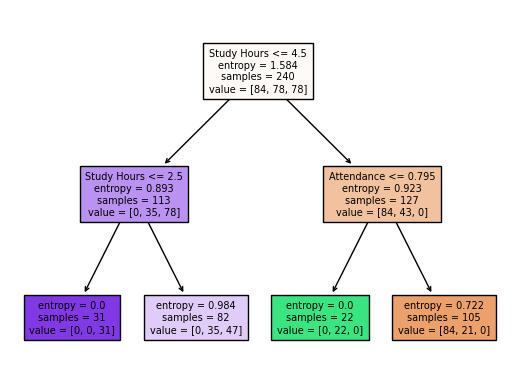

In [88]:
from sklearn.tree import plot_tree
a = plot_tree(clf, feature_names=X.columns.tolist(), fontsize=7, filled=True)
plt.show()

In [48]:
feature_importances = clf.feature_importances_

# Now, feature_importances contains the importance of each feature
# You can print or analyze this array to understand which features contribute most to the decision making
print("Feature importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

Feature importances:
Feature 0: 0.0
Feature 1: 0.18545650514986003
Feature 2: 0.81454349485014
